In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Egocentric networks: set of ties connecting ego and alters, out to a set distance

Several ego-network types:
- 1.0 (ego, alters and ties from ego to alter)
- 1.5 (1.0 and ties from alter to alter)
- 2.0 (1.5 and ties from alter's own alters)

Why study Ego Networks? https://www.youtube.com/watch?v=SM08TsCldWI
- complete networks are very large
- sometimes individuals are interesting


Ego networks metrics https://olizardo.github.io/networks-textbook/6-lesson-egonet-metrics.html

Data for analysis: Stanford Facebook Dataset
http://snap.stanford.edu/data/ego-Facebook.html

More on analysis this network: https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html

In [2]:
# read dataset
facebook = pd.read_csv(
    "data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [3]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node", create_using=nx.DiGraph())

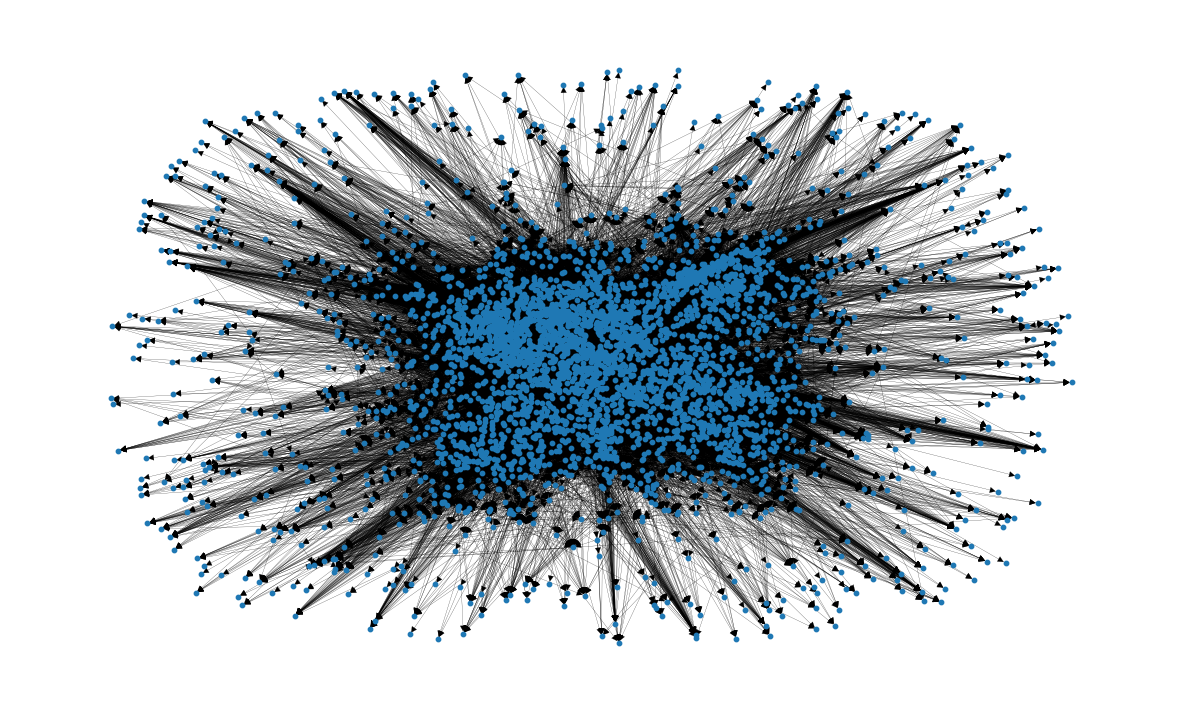

In [4]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

# Ego-networks analysis 
The main properties of ego-network:
- Size: Total number of ego-alter ties
- Diversity: Variation in alter attributes
- Homogeneity: Ties to alter same/different from ego
- Composition: Proportion of certain types of alter ties
- Clustering: Density of alter-to-alter network

In [5]:
pagerank = nx.pagerank(G)
pagerank_df = pd.DataFrame(pagerank, index=[0]).T
pagerank_df.columns = ['pagerank']
pagerank_df.sort_values('pagerank', inplace=True,
ascending=False)
pagerank_df.head(5)

,pagerank
1911,0.009409
3434,0.009341
2655,0.009030
1902,0.008947
1888,0.006871


In [19]:
G_ego_1911 = nx.ego_graph(G.reverse(), 1911, undirected=False)
G_ego_1911 = G_ego_1911.reverse()

In [20]:
G_ego_1911.nodes

NodeView((1283, 1527, 1161, 1419, 1805, 1813, 1047, 1561, 1817, 1437, 1440, 1571, 1702, 1321, 1327, 1077, 1718, 1337, 1594, 1214, 1858, 1860, 1863, 1352, 1865, 1230, 1361, 1110, 1626, 1123, 1124, 107, 1774, 1902, 1008, 1521, 1523, 1909, 1911, 1150))

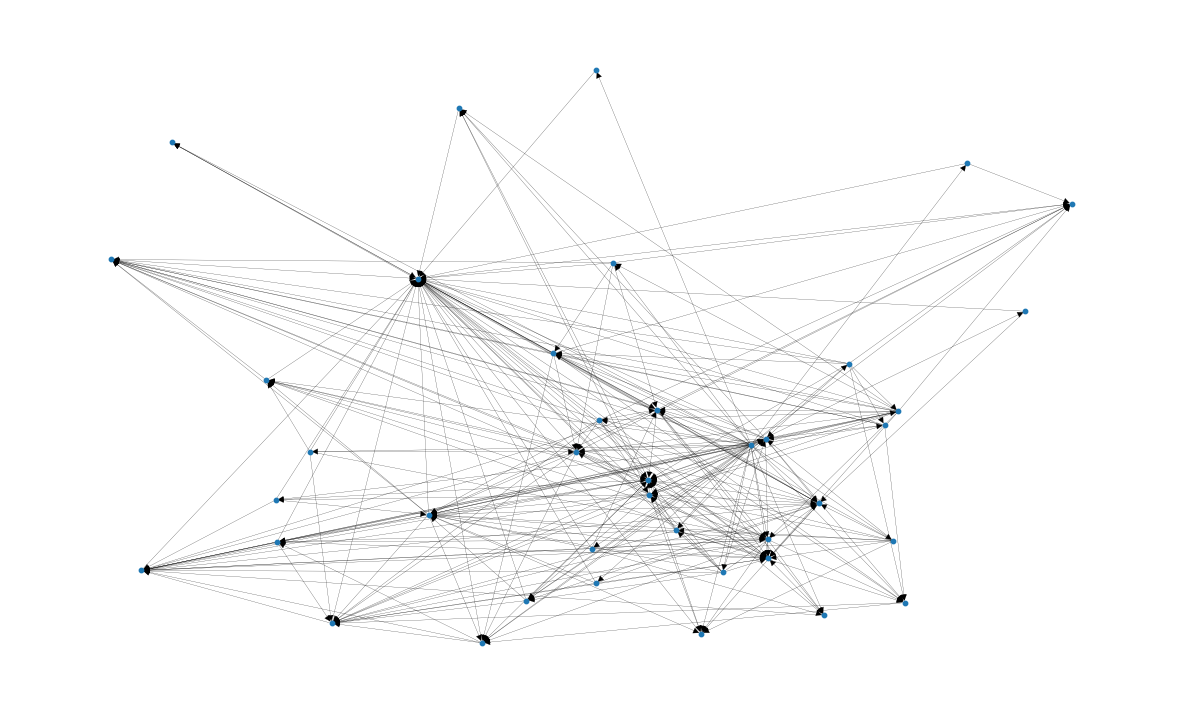

In [21]:
pos = nx.spring_layout(G_ego_1911, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G_ego_1911, pos=pos, ax=ax, **plot_options)

In [32]:
# EI Homophily Index
def ego_EI(G, ego_id):
    external = len(G.out_edges(ego_id))
    internal = len(G.in_edges(ego_id))
    return (external-internal)/(external+internal)

In [33]:
ego_EI(G_ego_1911, 1911) # all links are internal

-1.0

In [36]:
# what to do with digraph?
def ego_clustering_coeff(G, ego_id):
    n = len(G.nodes) - 1
    m = 0
    for edge in G.edges:
        if ego_id not in edge:
            m += 1
    return 2*m/(n*(n-1))

In [37]:
ego_clustering_coeff(G_ego_1911, 1911) 
# if we were to pick two of ego’s alters at random the probability that the two would be part of a connected dyad is p = 0.31

0.31309041835357626